### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_loja1 = loja['Preço'].astype(float).sum()
faturamento_loja2 = loja2['Preço'].astype(float).sum()
faturamento_loja3 = loja3['Preço'].astype(float).sum()
faturamento_loja4 = loja4['Preço'].astype(float).sum()


In [ ]:

print(f"Faturamento da loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento da loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento da loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento da loja 4: R${faturamento_loja4:.2f}")

# Faturamento total de todas as lojas
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"\nfaturamento total de todas as lojas: R${faturamento_total:.2f}")


Faturamento da loja 1: R$1534509.12
Faturamento da loja 2: R$1488459.06
Faturamento da loja 3: R$1464025.03
Faturamento da loja 4: R$1384497.58

faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria


In [12]:
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVendas por categoria na loja {numero}:")
    print(vendas)

In [13]:
vendas_por_categoria(loja, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)


Vendas por categoria na loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis      

# 3. Média de Avaliação das Lojas

In [ ]:
def avaliacao_media(loja, numero):
    media = loja['Avaliação da compra'].mean()
    print(f"Avaliação média da loja {numero}: {media:.2f}")

In [10]:
def avaliacao_media(loja, numero):
    qtde_avaliacao = loja['Avaliação da compra'].count()
    media = loja['Avaliação da compra'].mean()
    print(f"Avaliação média da loja {numero}: {media:.2f} com {qtde_avaliacao} Avaliações")

In [11]:
avaliacao_media(loja, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)

Avaliação média da loja 1: 3.98 com 2359 Avaliações
Avaliação média da loja 2: 4.04 com 2359 Avaliações
Avaliação média da loja 3: 4.05 com 2359 Avaliações
Avaliação média da loja 4: 4.00 com 2358 Avaliações


# 4. Produtos Mais e Menos Vendidos

In [17]:
urls = [url, url2, url3, url4]
df_total = pd.concat(
	[pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
	ignore_index=True
)

# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Receita'] = df_total['Preço']

vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

# Função pra mostrar os 3 produtos mais e menos vendidos
def top_produtos(loja):
	dados = vendas[vendas['Loja'] == loja]

	top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
	top_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(3)

	print(f"\n{loja} - Top 3 produtos que mais dinheiro geraram: ")
	for produto, linha in top_mais_vendidos.iterrows():
	   print(f" {linha['Produto']} - Receita: R${linha['Receita']:.2f}")


	print(f"\n{loja} - Top 3 produtos que menos dinheiro geraram: ")
	for produto, linha in top_menos_vendidos.iterrows():
	   print(f" {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

lojas_unicas = vendas['Loja'].unique()

for loja in lojas_unicas:
	top_produtos(loja)


Loja 1 - Top 3 produtos que mais dinheiro geraram: 
 TV Led UHD 4K - Receita: R$189534.28
 Geladeira - Receita: R$149524.28
 Celular Plus X42 - Receita: R$130536.40

Loja 1 - Top 3 produtos que menos dinheiro geraram: 
 Corda de pular - Receita: R$870.89
 Dinossauro Rex - Receita: R$918.40
 Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - Top 3 produtos que mais dinheiro geraram: 
 Celular Plus X42 - Receita: R$150967.83
 TV Led UHD 4K - Receita: R$137833.06
 Geladeira - Receita: R$130176.48

Loja 2 - Top 3 produtos que menos dinheiro geraram: 
 Cubo mágico 8x8 - Receita: R$858.22
 Dinossauro Rex - Receita: R$1027.41
 Corda de pular - Receita: R$1142.54

Loja 3 - Top 3 produtos que mais dinheiro geraram: 
 Geladeira - Receita: R$133185.99
 TV Led UHD 4K - Receita: R$128892.11
 Celular Plus X42 - Receita: R$124300.84

Loja 3 - Top 3 produtos que menos dinheiro geraram: 
 Cubo mágico 8x8 - Receita: R$853.81
 Dinossauro Rex - Receita: R$1060.78
 Corda de pular - Receita: R$1137.76

Loja 4 -

# 5. Frete Médio por Loja


In [18]:
# 5 Cálculo do frete mádio

df_total['Frete'] = df_total['Frete'].astype(float)

envio_medio = df_total.groupby('Loja')['Frete'].mean()

print("\n Envio médio por loja: ")
for loja, medio in envio_medio.items():
    print(f"{loja}: R${medio:.2f}")


 Envio médio por loja: 
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


In [14]:
import matplotlib.pyplot as plt

In [21]:
receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_receitas = receitas_totais

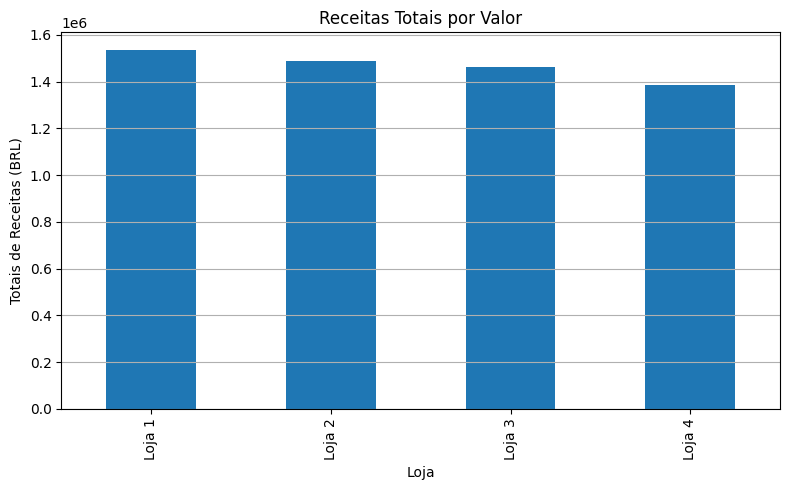

In [22]:
plt.figure(figsize=(8,5))
receitas_totais.plot(kind='bar')
plt.title('Receitas Totais por Valor')
plt.ylabel('Totais de Receitas (BRL)')
plt.xlabel('Loja')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

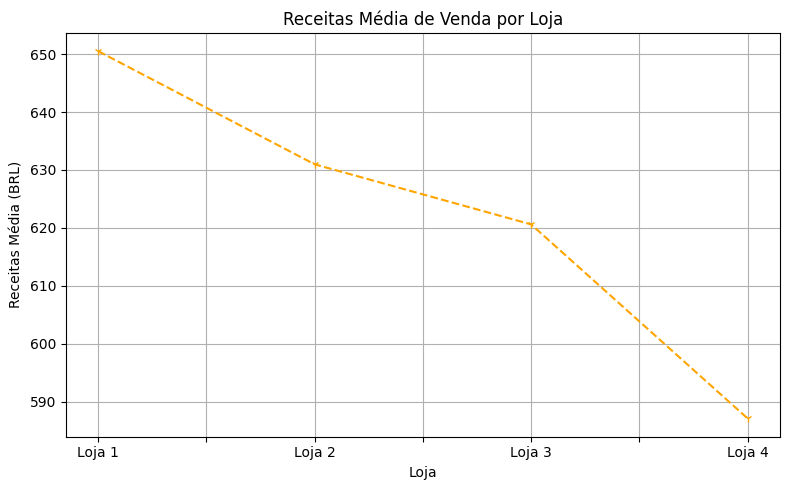

In [25]:
plt.figure(figsize=(8,5))
receita_media.plot(kind='line', marker='1', linestyle='--', color='orange')
plt.title('Receitas Média de Venda por Loja')
plt.ylabel('Receitas Média (BRL)')
plt.xlabel('Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

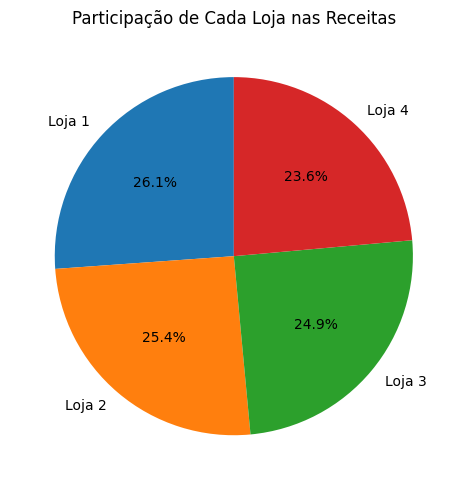

In [27]:
plt.figure(figsize=(8,5))
receitas_totais.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação de Cada Loja nas Receitas')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Relatório de Avaliação das Lojas

In [30]:
# De acordo com a avalição de desempenho das lojas, constatei que a diferença entre as lojas são bem sutis, e não vejo motivo pra vender alguma loja, pois ao elaborar uma campanha de marketing pode fazer as receitas subirem. Entretanto caso seja necessário vender alguma loja pra poder fazer um outro investimento indico a loja número 4. Lembrando que vendendo a loja pra fazer esse investiemnto, o retorno pode ser de longo prazo ou até mesmo trazer prejuízos, então é preciso analisar bem as duas situações.